# Honey Bee Pollen Classification

## Abstract

In this notebook,we have analysed the CNN model to classfy the pollen and non-pollen honey bee images from the dataset. For this dataset, we have tried various combination to access the accuracy like changing the activatin function for the convolution layer, changing the cost function, change in number of epoch value, trying different gradient estimation, changing network architecture like reducing the layer, try different kernal sizes and tried different network initialization. We have compared the accuracy for all the type of variation in the CNN model.

## Dataset

Honey Bee Pollen dataset has been created from videos captured at the entrance of a bee colony in June 2017 at the Bee facility of the Gurabo Agricultural Experimental Station of the University of Puerto Rico.
Dataset  contains images for pollen bearing and no pollen bearing honey bees. Images will be read by code and convert into numpy array of size 64*64 .

In [ ]:
import glob, os, cv2 
from skimage import io, transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [80]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# listing the directory
items = os.listdir('/content/drive/My Drive/images')
 
images = []
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    images.append(full_path)

# Create image list    
print(images)

['/content/drive/My Drive/images/NP10057-126r.jpg', '/content/drive/My Drive/images/NP10109-128r.jpg', '/content/drive/My Drive/images/NP10546-134r.jpg', '/content/drive/My Drive/images/NP1034-9r.jpg', '/content/drive/My Drive/images/NP10536-27r.jpg', '/content/drive/My Drive/images/NP10154-130r.jpg', '/content/drive/My Drive/images/NP10304-132r.jpg', '/content/drive/My Drive/images/NP10566-136r.jpg', '/content/drive/My Drive/images/NP10604-138r.jpg', '/content/drive/My Drive/images/NP10623-139r.jpg', '/content/drive/My Drive/images/NP10660-141r.jpg', '/content/drive/My Drive/images/NP10861-146r.jpg', '/content/drive/My Drive/images/NP11139-148r.jpg', '/content/drive/My Drive/images/NP10848-144r.jpg', '/content/drive/My Drive/images/NP10710-143r.jpg', '/content/drive/My Drive/images/NP11180-150r.jpg', '/content/drive/My Drive/images/NP1149-11r.jpg', '/content/drive/My Drive/images/NP11354-156r.jpg', '/content/drive/My Drive/images/NP11290-152r.jpg', '/content/drive/My Drive/images/NP11

In [0]:
"""
First, Function will read all image of honey bee.
Second, All images will be resize to 300*180 size.
Third, All image will be flatten and store into list variable.
Labels will be assign as 0 for Non Pollen Bee and 1 for Pollen Bee.
Funtion will return array of flatten image and array of labels

"""
def dataset(file_list,size=(64,64),flattened=False):
	data = []
	for i, file in enumerate(file_list):
		image = io.imread(file)
		image = transform.resize(image, size, mode='constant')
		if flattened:
			image = image.flatten()

		data.append(image)

	labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

	return np.array(data), np.array(labels)

In [0]:
# Call dataset funtion to create feature and target label
X,y=dataset(images)

In [84]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

X:  (714, 64, 64, 3)
y:  (714,)


In [85]:
print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))
print(y)
 

Class 0:  345
Class 1:  369
Total  :  714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

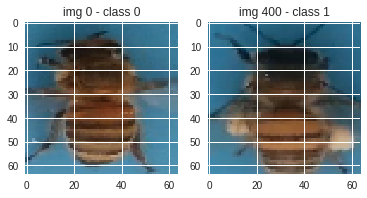

In [86]:
%matplotlib inline
# Bellow images is of Pollen and NonPollen Honey Bee
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=400
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=123)
print(X_train.shape,y_train.shape)

(571, 64, 64, 3) (571,)


# Part A
## CNN Model

Build a CNN model function which have three convolution and pooling layer with three fully connected layer(one dense, one dropout and one output layer).

In [0]:
def create_model(features, labels, mode, params):
  
    # Reshape the input image to 64*64 
    entry_data = tf.reshape(features['X'], [-1, 64, 64, 3])
    
    ### Condition to get the parameter values
    
    # Default flags 
    actn_fun = tf.nn.relu  
    error_cng = False
    optm_flag = False
    layer_flag = False
    kernal_init = None
    ker_size = 5
    
    # For Part B
          
    if params.get('A') == 1:
      actn_fun = params.get('B')[0]      
    elif params.get('A') == 2:
      error_cng = True
    elif params.get('A') == 3:
      optm_flag = True      
    elif params.get('A') == 4:
      layer_flag = True    
    elif params.get('A') == 5: 
      ker_size = params.get('F')[0]
    elif params.get('A') == 6: 
      kernal_init = params.get('G')[0]
    else:
      actn_fun = tf.nn.relu  
      error_cng = False
      optm_flag = False
      layer_flag = False
      kernal_init = None
      ker_size = 5
    
    #### First layer
    
    # First Convolution Layer with 32 filter having kernal size of 5 and activation function
    convolu1 = tf.layers.conv2d(inputs = entry_data, filters = 32, kernel_size=ker_size, activation = actn_fun,padding = 'same',kernel_initializer=kernal_init)   
    # First Pooling layer of max_pooling with pool_size of 2 and strides of 2 pixel
    pooling1 = tf.layers.max_pooling2d(inputs = convolu1, pool_size = [2,2], strides = 2)
    
   
    #### Second Layer
    
    # Second Convolution Layer with 64 filter having kernal size of 5 and activation function
    convolu2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = ker_size, activation = actn_fun,padding = 'same',kernel_initializer=kernal_init)
    # Second Pooling layer of max_pooling with pool_size of 2 and strides of 2 pixel
    pooling2 = tf.layers.max_pooling2d(inputs = convolu2, pool_size = [2,2], strides = 2)
    
    
    #### Third Layer
    
    # Third Convolution Layer with 64 filter having kernal size of 5 and activation function
    convolu3 = tf.layers.conv2d(inputs = pooling2, filters = 128, kernel_size = ker_size, activation = actn_fun,padding = 'same',kernel_initializer=kernal_init)
    # Third Pooling layer of max_pooling with pool_size of 2 and strides of 2 pixel
    pooling3 = tf.layers.max_pooling2d(inputs = convolu3, pool_size = [2,2], strides = 2)
    
    
    #### Fully connected Layer
    
    # Flat the output of last pooling layer
    
    if layer_flag:
      flattening = tf.reshape(pooling2, [-1, 16 * 16 * 64])
    else:
      flattening = tf.reshape(pooling3, [-1, 8 * 8 * 128])
    
    # First dense layer with 3000 units 
    dense = tf.layers.dense(inputs = flattening, units = 3000, activation = tf.nn.relu)
    # dropout layer with dropout rate 30%
    dropout = tf.layers.dropout(inputs = dense, rate = 0.3, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    
    #### Output Layer with 2 units since we are dealing with binary classification
    exit_l = tf.layers.dense(inputs = dropout, units = 2)
    
    # Predicted lables by using argmax function
    #predicted = tf.argmax(exit_l, axis = 1);
    
    predicted = {
        "classes" : tf.argmax(exit_l, axis = 1),        
    }
    
    # For inference mode
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predicted)
    
    # Error rate for Train and Eval model mode
    if error_cng:
      temp_labels = tf.reshape(labels, [-1, 1])
      error = tf.losses.hinge_loss(labels = temp_labels, logits = exit_l[:,1:])
    else:
      error = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = exit_l)
    
       
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predicted["classes"])
    logging_hook = tf.train.LoggingTensorHook({"loss" : error, "accuracy" : accuracy[1]}, every_n_iter=10)
    
    # For Train mode, Use optimizer to optimize the weights
    if mode == tf.estimator.ModeKeys.TRAIN:
      if optm_flag:
        optimizer = tf.train.AdagradOptimizer(learning_rate = 0.001)
      else:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
      training = optimizer.minimize(error, global_step = tf.train.get_global_step())
      steps = tf.train.get_global_step()
      return tf.estimator.EstimatorSpec(mode = mode, loss = error, train_op = training,training_hooks = [logging_hook])   
    
    # For Eval Model, measure the accuracy for the test data
    if mode == tf.estimator.ModeKeys.EVAL:
        accuracy = tf.metrics.accuracy(labels = labels, predictions = predicted['classes'])
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = predicted['classes'])}
        logging_hook = tf.train.LoggingTensorHook({"loss" : error, "accuracy" : accuracy[1]}, every_n_iter=10)
        return tf.estimator.EstimatorSpec(mode = mode, loss = error, eval_metric_ops = eval_metrics_ops,evaluation_hooks=[logging_hook])

In [0]:
def model_train_test(classifier,epoch_num):
  
  # Train CNN model for train images with batch size of 16 with steps = 100
  train_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_train}, y = y_train,batch_size = 16, num_epochs = None, shuffle = True)
  classifier.train(input_fn=train_function, steps = 100)

  # Test CNN model with test dataset with num_epochs from the function
  test_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_test}, y = y_test, num_epochs = epoch_num,shuffle = False)
  pred_value = classifier.evaluate(input_fn=test_function)
  
  # Return accuracy
  return pred_value

In [0]:
def bar_plot(list,x_pos,y_label,title):
  y_pos = np.arange(len(list))
  plt.bar(y_pos,x_pos,align='center',alpha=0.5,color='g')
  plt.xticks(y_pos, list)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()
  

# Part B
## Different Activation function

Below funtion will train CNN with three activation function like (1) Rectified linear unit (ReLU)
(2) Leaky rectified linear unit (Leaky ReLU)  (3) TanH. Also CNN will be trained for test dataset and measure the accuracy for each CNN with activation function.



## Relu Activation Function:

In [92]:
tf.logging.set_verbosity(tf.logging.INFO)

Acc_list = []

# Train and test CNN model with Relu Activation function  
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 1 ,'B':[tf.nn.relu]})
Accuracy_Relu = model_train_test(classifier,100)

#print(Accuracy_Relu)
Acc_list.append(Accuracy_Relu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7jcxo5hi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11a7220518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## LeakyRelu Activation Function

In [93]:
# Train and test CNN model with LeakyRelu Activation function
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 1 ,'B':[tf.nn.leaky_relu]})
Accuracy_LeakyRelu = model_train_test(classifier,100)

#print(Accuracy_LeakyRelu)
Acc_list.append(Accuracy_LeakyRelu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxt9bd3jx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11a73b4470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## Tanh Activation Function

In [94]:
# Train and test CNN model with Tanh Activation function
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 1 ,'B':[tf.nn.tanh]})
Accuracy_Tanh = model_train_test(classifier,100)

#print(Accuracy_Tanh)
Acc_list.append(Accuracy_Tanh.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqipjj9ja', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11ab7b4860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [95]:
accuracy_df = pd.DataFrame({'Activation_Function':['ReLU','LeakyReLU','Tanh'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Activation_Function
0,79.020977,ReLU
1,88.111889,LeakyReLU
2,83.916086,Tanh


From the above table, By using LeakyReLu activation function, we get best accuracy compare to LeakyReLU and Tanh activation function.

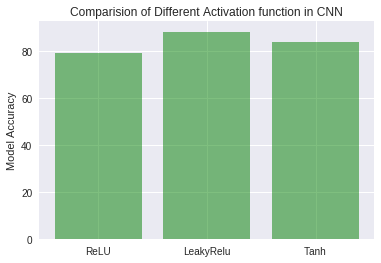

In [96]:
bar_plot(['ReLU','LeakyRelu','Tanh'],Acc_list,"Model Accuracy","Comparision of Different Activation function in CNN")

# Part C
## Changes in Cost function

## Hindge Cost function:


In [97]:
Acc_list = []

# Train and test CNN model with hindge cost function
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 2})
Accuracy_Hindge = model_train_test(classifier,100)

#print(Accuracy_Hindge)
Acc_list.append(Accuracy_Hindge.get('accuracy')*100)

#print(Accuracy_Relu)
Acc_list.append(Accuracy_Relu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpldgxif8p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11ac4279e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [98]:
accuracy_df = pd.DataFrame({'Cost_Function':['Hindge Loss','Cross-Entroy'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Cost_Function
0,85.314685,Hindge Loss
1,79.020977,Cross-Entroy


From the above table, Hindge Loss function give more accuracy than cross-entropy cost fucnction.

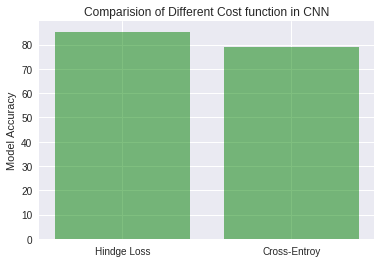

In [99]:
bar_plot(['Hindge Loss','Cross-Entroy'],Acc_list,"Model Accuracy","Comparision of Different Cost function in CNN")

# Part D
## Variable  Epochs Values

To check effect of epoch value, I have tried 100,50,10 and 1 epoch value to get the accuracy which is mention below.

In [100]:
epoch_list = [50,10,1]
Acc_list = []
Accuracy_epoch_list = []

#below loop try all epoch value and train and test the model to get the accuracy
for numb in epoch_list:
  classifier = tf.estimator.Estimator(model_fn = create_model,params={})
  Accuracy_epoch_list.append(model_train_test(classifier,numb))

#print(Accuracy_epoch_list) 
Acc_list = [i.get('accuracy')*100 for i in Accuracy_epoch_list]

#print(Accuracy_Relu)
Acc_list.append(Accuracy_Relu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx5grb4vi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11abac8320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [101]:
accuracy_df = pd.DataFrame({'Epoch Values':['50','10','1','100'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Epoch Values
0,83.216780,50
1,83.216780,10
2,81.818181,1
3,79.020977,100


From the above code, CNN with 50 and 10 epoch values gives highest accuracy compacre to other values like 100, and 1.

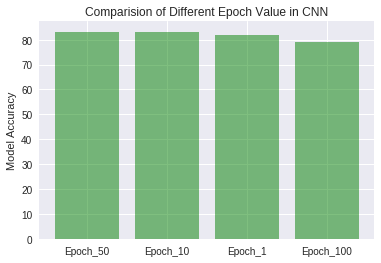

In [102]:
bar_plot(['Epoch_50','Epoch_10','Epoch_1','Epoch_100'],Acc_list,"Model Accuracy","Comparision of Different Epoch Value in CNN")

# Part E
## Changes in Gradient estimation

## ADA Gradient Estimation:

I have compared ADA gradient and ADAM gradient to check the accuracy of the CNN network.

In [103]:
Acc_list = []

# Train and test CNN model with ADA Gradient estimation
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 3})
Accuracy_AdaGrad = model_train_test(classifier,100)

#print(Accuracy_AdaGrad)
Acc_list.append(Accuracy_AdaGrad.get('accuracy')*100)

#print(Accuracy_Relu)
Acc_list.append(Accuracy_Relu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdup10x2l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11ab7b4550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [104]:
accuracy_df = pd.DataFrame({'Gradient Estimation':['Adagrad','ADAM'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Gradient Estimation
0,54.545456,Adagrad
1,79.020977,ADAM


From the table, ADAM gradient gives more accuracy than Ada gradient estimation.

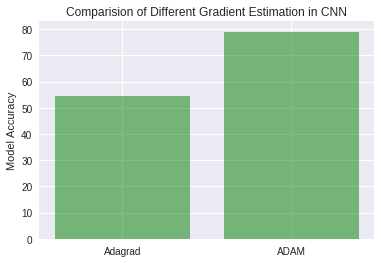

In [105]:
bar_plot(['Adagrad','ADAM'],Acc_list,"Model Accuracy","Comparision of Different Gradient Estimation in CNN")

# Part F 
##Changes in Network Architecture

In below code,  I have tried to edit the layer in the CNN model and also change the kernal size to check the effect in the accuracy after changing the network architecture.

## CNN with Two Layer

In [106]:
Acc_list = []

# Train and test CNN model with two layer
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 4})
Accuracy_TwoLayerCNN = model_train_test(classifier,100)
#print(Accuracy_TwoLayerCNN)
Acc_list.append(Accuracy_TwoLayerCNN.get('accuracy')*100)

#print(Accuracy_Relu)
Acc_list.append(Accuracy_Relu.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpee1yq5da', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11ab8bf278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## CNN with kernal size = 5

In [107]:
# Train and test CNN model with kernal size=5
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 5, 'F':[2]})
Accuracy_KernalSize_Two = model_train_test(classifier,100)
#print(Accuracy_KernalSize_Two)
Acc_list.append(Accuracy_KernalSize_Two.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphi2jgeb0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11ee709d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## CNN with Kernal size= 3

In [108]:
# Train and test CNN model with kernal size=3
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 5, 'F':[3]})
Accuracy_KernalSize_Three = model_train_test(classifier,100)
#print(Accuracy_KernalSize_Three)
Acc_list.append(Accuracy_KernalSize_Three.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpegbi4m34', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11a727d2e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [109]:
accuracy_df = pd.DataFrame({'Network Architecture Type':['CNN with 2 hidden Layer','CNN with 3 hidden Layer', 'CNN with kernal size 2','CNN with kernal size 3'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Network Architecture Type
0,78.321677,CNN with 2 hidden Layer
1,79.020977,CNN with 3 hidden Layer
2,84.615386,CNN with kernal size 2
3,83.916086,CNN with kernal size 3


From the table, CNN with kernal size 2 gave best accuracy compared to other network architecture change.

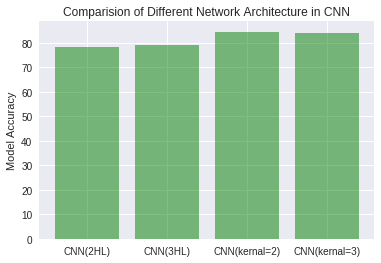

In [110]:
bar_plot(['CNN(2HL)','CNN(3HL)', 'CNN(kernal=2)','CNN(kernal=3)'],Acc_list,"Model Accuracy","Comparision of Different Network Architecture in CNN")

# Part G
## Network initialization 

## Xavier Glorot Initializar (Uniform)

In [111]:
Acc_list = []

# Train and test CNN model with Xavier glorot(Uniform) initializar in convolution layer
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 6, 'G':[tf.contrib.layers.xavier_initializer(uniform=True)] })
Accuracy_Xav_Init_Uni = model_train_test(classifier,100)
#print(Accuracy_Xav_Init_Uni)
Acc_list.append(Accuracy_Xav_Init_Uni.get('accuracy')*100)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpiay0cdy4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f119fb9d6d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', 

## Xavier Glorot Initializer (Gaussian)

In [112]:
# Train and test CNN model with Xavier glorot(Gaussian) initializar in convolution layer
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 6, 'G':[tf.contrib.layers.xavier_initializer(uniform=False)] })
Accuracy_Xav_Init_Gau = model_train_test(classifier,100)
#print(Accuracy_Xav_Init_Gau)
Acc_list.append(Accuracy_Xav_Init_Gau.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpko5z0r4c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11a734f668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## Random Gaussain

In [113]:
# Train and test CNN model with random gaussain initializar in convolution layer
classifier = tf.estimator.Estimator(model_fn = create_model,params={'A': 6, 'G':[tf.initializers.random_normal] })
Accuracy_Rand_Gau = model_train_test(classifier,100)
#print(Accuracy_Rand_Gau)
Acc_list.append(Accuracy_Rand_Gau.get('accuracy')*100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmps_jinn2t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11a057e748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

In [114]:
accuracy_df = pd.DataFrame({'Network Initialization Type':['Xavier Glorot(Uniform)','Xavier Glorot(Gaussian)', 'Random Gaussian'],'Accuracy':Acc_list})
accuracy_df.head()

,Accuracy,Network Initialization Type
0,81.818181,Xavier Glorot(Uniform)
1,79.720283,Xavier Glorot(Gaussian)
2,81.118882,Random Gaussian


from the above table, Xavier Glorot kernal initializer gave the best accuracy among other initializer like random gaussain.

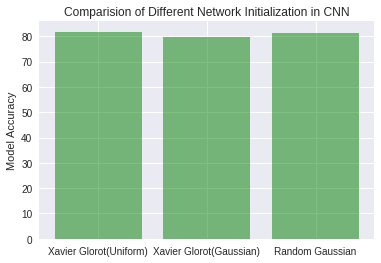

In [115]:
bar_plot(['Xavier Glorot(Uniform)','Xavier Glorot(Gaussian)', 'Random Gaussian'],Acc_list,"Model Accuracy","Comparision of Different Network Initialization in CNN")

## Conclusion:

After trying multiple variation in CNN model for the honey been dataset to classify the pollern and non-pollern honey bee, below are the findings.
* Part B: After using LeakyRelu function, the accuracy is 88.11% which highest compared to other activation function like Relu and Tanh.
* Part C: 85.35% accuracy is achieved after using the hindge cost function in CNN model which higher than the CNN model with cross-entropy cost function.
* Part D: Epoch value is important variable for CNN model and for this dataset, Epoch values 50 and 10 gave the best accuracy(83%) for this dataset.
* Part E: Different gradient estimation used for loss calculation and back prapogation where Adam gradient estimation performs better with accuracy 79% than Adagrad estimation.
* Part F: With different network architecture, CNN model with kernal size 2 perform well for honey been data set with accuracy 84%. 
* Part G: Xavier glorot kernal initializer(Uniform) have higher accuracy(81%) than other initializers.


## Citations:

* https://www.tensorflow.org/tutorials/estimators/cnn

* https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns

* https://www.tensorflow.org/api_docs/python/tf/estimator/EstimatorSpec

* https://www.tensorflow.org/api_docs/python/tf/layers/Conv2D

* https://www.tensorflow.org/

## Licence:

MIT License

Copyright (c) 2019 Akshay Patel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
